In [1]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv("salary.txt")  #calısma yılına göre maas belirleme

In [7]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [8]:
X = df[["YearsExperience"]]
y = df[["Salary"]]

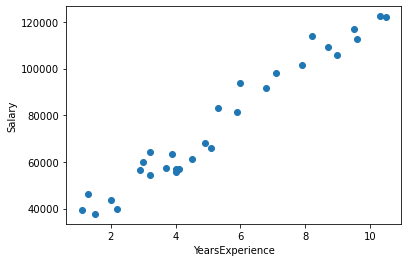

In [9]:

plt.scatter(X, y)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [10]:
reg_model = LinearRegression().fit(X, y) # ŷ = β0 + β1x 
print("β0: ",reg_model.intercept_[0]) # β0 
print("β1: ",reg_model.coef_[0][0]) # β1

β0:  25792.20019866871
β1:  9449.962321455074


In [11]:
reg_model.intercept_[0] + reg_model.coef_[0][0] * 6 

82491.97412739915

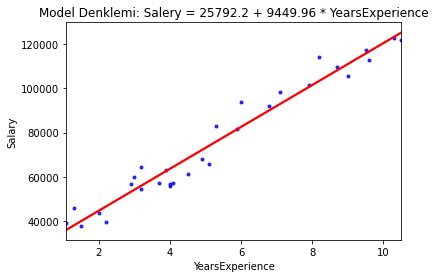

In [16]:
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},ci=False, color="r")
g.set_title(f"Model Denklemi: Salery = {round(reg_model.intercept_[0], 2)} + {round(reg_model.coef_[0][0], 2)} * YearsExperience")
g.set_xlabel("YearsExperience")
g.set_ylabel("Salary")
plt.show()

In [17]:
#coklu dogrusal regresyon

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [20]:
df=pd.read_csv("Advertising.txt")  #Medya kuruluşlarına ayrılan bütçeye göre satış tahmini

In [21]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [22]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [23]:
X = df.drop('sales', axis=1)
y = df[["sales"]]

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

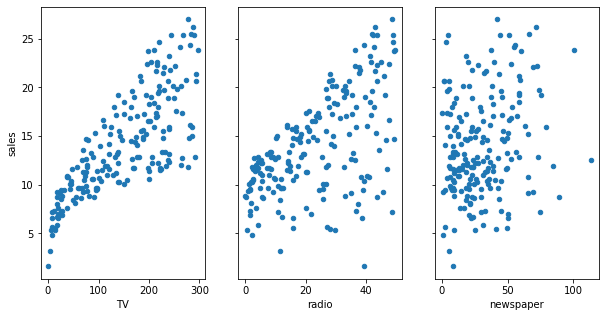

In [36]:
fig,axs= plt.subplots(1,3,sharey=True) # sharey : share same y axis across the plot
df.plot(kind="scatter",x='TV',y='sales',ax=axs[0],figsize=(10,5))
df.plot(kind="scatter",x='radio',y='sales',ax=axs[1],figsize=(10,5))
df.plot(kind="scatter",x='newspaper',y='sales',ax=axs[2],figsize=(10,5))

In [26]:
?df.plot

Signature:      df.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x0000024BF3E16240>
File:           c:\users\aslisesli\anaconda3\envs\python\lib\site-packages\pandas\plotting\_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'ar

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20, random_state=1)
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
print(reg_model.intercept_)
print(reg_model.coef_)

[2.90794702]
[[0.0468431  0.17854434 0.00258619]]


In [33]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

reg_model.score(X_train, y_train)

0.8959372632325174

In [34]:
y_pred = reg_model.predict(X_test)
print("mse: ", mean_squared_error(y_test, y_pred))
print("rmse: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("mae: ",  mean_absolute_error(y_test, y_pred))

mse:  1.9918855518287877
rmse:  1.4113417558581578
mae:  1.0402154012924711


0
1
1
2
3
5
8
13
